## Performing modeling on the houston crime dataset.

The models used for our classification are:

* Random Forest
* KNN 
* ADABoost Classifier
* XGBoost

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

In [2]:
df = pd.read_csv("/Users/lohithramesh/Desktop/M.S in Data Science/Semester 2/Data Mining/Final Project/Houston-Crime-Analysis/Dataset/Dataset_after_preprocessing.csv")

In [3]:
df.head()

,Incident,RMSOccurrenceDate,RMSOccurrenceHour,NIBRSClass,NIBRSDescription,OffenseCount,Beat,Premise,StreetName,City,...,AsianPercent,WhitePercent,MedianAge,AgeDepRatio,OldAgeDepRatio,ChildDepRatio,HomeOwnershipPercent,AverageEarnings,PovertyPercent,UnemploymentRate
0,5619,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",SAN CARLOS,HOUSTON,...,0.79,36.00,34.2,60.0,17.1,43.0,43.1,31541.0,27.12,0.106
1,17319,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,...,1.17,18.17,35.7,59.9,21.2,38.7,51.8,34278.0,27.89,0.088
2,17319,2019-01-01,0,90D,Driving under the influence,1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,...,1.17,18.17,35.7,59.9,21.2,38.7,51.8,34278.0,27.89,0.088
3,18119,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",LONE QUAIL,HOUSTON,...,3.48,15.68,36.5,61.7,21.4,40.3,74.7,41145.0,9.38,0.070
4,20519,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,...,17.75,51.15,37.8,55.1,24.6,30.5,40.1,66370.0,11.10,0.041


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255714 entries, 0 to 1255713
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Incident              1255714 non-null  int64  
 1   RMSOccurrenceDate     1255714 non-null  object 
 2   RMSOccurrenceHour     1255714 non-null  int64  
 3   NIBRSClass            1255714 non-null  object 
 4   NIBRSDescription      1255714 non-null  object 
 5   OffenseCount          1255714 non-null  int64  
 6   Beat                  1255714 non-null  object 
 7   Premise               1255714 non-null  object 
 8   StreetName            1255714 non-null  object 
 9   City                  1255714 non-null  object 
 10  ZIPCode               1255714 non-null  int64  
 11  MapLongitude          1255714 non-null  float64
 12  MapLatitude           1255714 non-null  float64
 13  month                 1255714 non-null  int64  
 14  year                  1255714 non-

In [5]:
df['Region'].unique()

array(['Northeast Division - District 7,8,9',
       'Southwest Division - District 15,16',
       'Southeast Division - District 13,14',
       'North Division - District 3,6',
       'Westside Division - District 19,20',
       'Northwest Division - District 4,5',
       'South Central Division - District 10',
       'Eastside Division - District 1',
       'Central Division - District 1,2',
       'South Gesner Division - District 17',
       'Clear Lake Division - District 12',
       'Midwest Division - District 18', 'Downtown Division - District 1',
       'NorthBelt Division - District 22',
       'Kingwod Division - District 24',
       'Airport-IAH Division - District 21',
       'Airport-Hoby Division - District 23', 'OOJ',
       'Harris County Constable’s Office Precinct 5',
       'Harris County Sheriffs Office'], dtype=object)

In [6]:
crime_rate_by_region = {}
for index, row in df.iterrows():
    region = row['Region']
    if region not in crime_rate_by_region:
        crime_rate_by_region[region] = row['OffenseCount']
    else:
        crime_rate_by_region[region] += row['OffenseCount']

In [7]:
crime_rate_by_region

{'Northeast Division - District 7,8,9': 132918,
 'Southwest Division - District 15,16': 90863,
 'Southeast Division - District 13,14': 111685,
 'North Division - District 3,6': 126415,
 'Westside Division - District 19,20': 170536,
 'Northwest Division - District 4,5': 75821,
 'South Central Division - District 10': 76065,
 'Eastside Division - District 1': 38625,
 'Central Division - District 1,2': 122156,
 'South Gesner Division - District 17': 74117,
 'Clear Lake Division - District 12': 63406,
 'Midwest Division - District 18': 101960,
 'Downtown Division - District 1': 20873,
 'NorthBelt Division - District 22': 66777,
 'Kingwod Division - District 24': 15156,
 'Airport-IAH Division - District 21': 7948,
 'Airport-Hoby Division - District 23': 2085,
 'OOJ': 839,
 'Harris County Constable’s Office Precinct 5': 37,
 'Harris County Sheriffs Office': 44}

In [8]:
total_offenses = sum(crime_rate_by_region.values())

crime_percentage_by_region = {}

for region, offenses in crime_rate_by_region.items():
    percentage = (offenses / total_offenses) * 100
    crime_percentage_by_region[region] = percentage

In [9]:
crime_percentage_by_region

{'Northeast Division - District 7,8,9': 10.23764447450024,
 'Southwest Division - District 15,16': 6.998473418848579,
 'Southeast Division - District 13,14': 8.602230872677588,
 'North Division - District 3,6': 9.736768731428008,
 'Westside Division - District 19,20': 13.13506777188472,
 'Northwest Division - District 4,5': 5.8399046156358265,
 'South Central Division - District 10': 5.8586980465614955,
 'Eastside Division - District 1': 2.974984711081808,
 'Central Division - District 1,2': 9.408730935065615,
 'South Gesner Division - District 17': 5.708658688187712,
 'Clear Lake Division - District 12': 4.883673283905583,
 'Midwest Division - District 18': 7.853189414677053,
 'Downtown Division - District 1': 1.6076855889815038,
 'NorthBelt Division - District 22': 5.143315315259804,
 'Kingwod Division - District 24': 1.1673493406124502,
 'Airport-IAH Division - District 21': 0.6121729057262968,
 'Airport-Hoby Division - District 23': 0.16059140770499858,
 'OOJ': 0.06462167437145987,

In [10]:
def get_crime_percentage(region):
    return crime_percentage_by_region.get(region, 0.0)

# Add a new column 'crime_percentage' to the DataFrame
df['crime_percentage'] = df['Region'].apply(get_crime_percentage)

In [11]:
df.head()

,Incident,RMSOccurrenceDate,RMSOccurrenceHour,NIBRSClass,NIBRSDescription,OffenseCount,Beat,Premise,StreetName,City,...,WhitePercent,MedianAge,AgeDepRatio,OldAgeDepRatio,ChildDepRatio,HomeOwnershipPercent,AverageEarnings,PovertyPercent,UnemploymentRate,crime_percentage
0,5619,2019-01-01,0,290,"Destruction, damage, vandalism",1,9C30,"Residence, Home (Includes Apartment)",SAN CARLOS,HOUSTON,...,36.00,34.2,60.0,17.1,43.0,43.1,31541.0,27.12,0.106,10.237644
1,17319,2019-01-01,0,35A,"Drug, narcotic violations",1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,...,18.17,35.7,59.9,21.2,38.7,51.8,34278.0,27.89,0.088,10.237644
2,17319,2019-01-01,0,90D,Driving under the influence,1,7C10,"Highway, Road, Street, Alley",EAST,HOUSTON,...,18.17,35.7,59.9,21.2,38.7,51.8,34278.0,27.89,0.088,10.237644
3,18119,2019-01-01,0,290,"Destruction, damage, vandalism",1,16E40,"Residence, Home (Includes Apartment)",LONE QUAIL,HOUSTON,...,15.68,36.5,61.7,21.4,40.3,74.7,41145.0,9.38,0.070,6.998473
4,20519,2019-01-01,0,13A,Aggravated Assault,1,15E30,"Residence, Home (Includes Apartment)",OSBY,HOUSTON,...,51.15,37.8,55.1,24.6,30.5,40.1,66370.0,11.10,0.041,6.998473


In [13]:
# Define a function to determine crime rate based on crime percentage
def determine_crime_rate(crime_percentage):
    if crime_percentage > 7:
        return 'high crime'
    else:
        return 'low crime'

# Apply the function to create the new 'crime_rate' column
df['crime_rate'] = df['crime_percentage'].apply(lambda x: determine_crime_rate(x))

In [14]:
# Total number of rows in the DataFrame
total_rows = len(df)

# Count the number of occurrences of 'high crime' and 'low crime'
crime_rate_counts = df['crime_rate'].value_counts()

# Calculate the percentage of total for each category
high_crime_percentage = (crime_rate_counts.get('high crime', 0) / total_rows) * 100
low_crime_percentage = (crime_rate_counts.get('low crime', 0) / total_rows) * 100

# Print the percentages
print("High Crime Percentage:", high_crime_percentage)
print("Low Crime Percentage:", low_crime_percentage)

High Crime Percentage: 58.935872340357754
Low Crime Percentage: 41.06412765964224


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255714 entries, 0 to 1255713
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Incident              1255714 non-null  int64  
 1   RMSOccurrenceDate     1255714 non-null  object 
 2   RMSOccurrenceHour     1255714 non-null  int64  
 3   NIBRSClass            1255714 non-null  object 
 4   NIBRSDescription      1255714 non-null  object 
 5   OffenseCount          1255714 non-null  int64  
 6   Beat                  1255714 non-null  object 
 7   Premise               1255714 non-null  object 
 8   StreetName            1255714 non-null  object 
 9   City                  1255714 non-null  object 
 10  ZIPCode               1255714 non-null  int64  
 11  MapLongitude          1255714 non-null  float64
 12  MapLatitude           1255714 non-null  float64
 13  month                 1255714 non-null  int64  
 14  year                  1255714 non-

### Model - Random Forest

In [44]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score

# Make random forest classifier
X = df[['ZIPCode','month','year','Population','BlackPercent', 'AsianPercent', 'WhitePercent', 'MedianAge', 'AgeDepRatio', 'OldAgeDepRatio', 'ChildDepRatio',
          'HomeOwnershipPercent', 'AverageEarnings', 'PovertyPercent', 'UnemploymentRate']]
y = df['crime_rate']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("\nClassification Report:")
print(classification_report)

conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix_rf)

Accuracy: 0.9623131344985649
F1 Score: 0.9622454394056024
Precision: 0.9623500453196513

Classification Report:
              precision    recall  f1-score   support

  high crime       0.96      0.98      0.97    184793
   low crime       0.96      0.94      0.95    129136

    accuracy                           0.96    313929
   macro avg       0.96      0.96      0.96    313929
weighted avg       0.96      0.96      0.96    313929


Confusion Matrix:
 [[180336   4457]
 [  7374 121762]]


In [24]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.9593892657600536


### Model - KNN 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['ZIPCode','month','year','Population','BlackPercent', 'AsianPercent', 'WhitePercent', 'MedianAge', 'AgeDepRatio', 'OldAgeDepRatio', 'ChildDepRatio',
          'HomeOwnershipPercent', 'AverageEarnings', 'PovertyPercent', 'UnemploymentRate']]
y = df['crime_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix_knn)

Accuracy: 0.9577889887434649

Classification Report:
               precision    recall  f1-score   support

  high crime       0.96      0.97      0.96    147785
   low crime       0.96      0.94      0.95    103358

    accuracy                           0.96    251143
   macro avg       0.96      0.95      0.96    251143
weighted avg       0.96      0.96      0.96    251143


Confusion Matrix:
 [[143466   4319]
 [  6282  97076]]


In [21]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.9541092950827463


### Model - ADA Boost Classifer

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['ZIPCode', 'month', 'year', 'Population', 'BlackPercent', 'AsianPercent', 'WhitePercent', 'MedianAge', 'AgeDepRatio', 'OldAgeDepRatio', 'ChildDepRatio', 'HomeOwnershipPercent', 'AverageEarnings', 'PovertyPercent', 'UnemploymentRate']]
y = df['crime_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost Classifier model
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada_boost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
conf_matrix_abc = confusion_matrix(y_test, y_pred)
print(conf_matrix_abc)

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9605682818155393
Classification Report:
              precision    recall  f1-score   support

  high crime       0.97      0.97      0.97    147785
   low crime       0.95      0.95      0.95    103358

    accuracy                           0.96    251143
   macro avg       0.96      0.96      0.96    251143
weighted avg       0.96      0.96      0.96    251143

Confusion Matrix:
[[142959   4826]
 [  5077  98281]]


In [34]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.9591119602862972


### Model - XGBoost

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df['crimeBinary'] = df['crime_rate'].apply(lambda x: 1 if x =='high crime' else 0)

# Define features (X) and target variable (y)
X = df[['ZIPCode', 'month', 'year', 'Population', 'BlackPercent', 'AsianPercent', 'WhitePercent', 'MedianAge', 'AgeDepRatio', 'OldAgeDepRatio', 'ChildDepRatio', 'HomeOwnershipPercent', 'AverageEarnings', 'PovertyPercent', 'UnemploymentRate']]
y = df['crimeBinary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and print the confusion matrix
print("Confusion Matrix:")
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
print(conf_matrix_xgb)

Accuracy: 0.9621570181131865
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    103358
           1       0.96      0.98      0.97    147785

    accuracy                           0.96    251143
   macro avg       0.96      0.96      0.96    251143
weighted avg       0.96      0.96      0.96    251143

Confusion Matrix:
[[ 97384   5974]
 [  3530 144255]]


In [39]:
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.9591574216492066


### Confusion Matrix for all the models

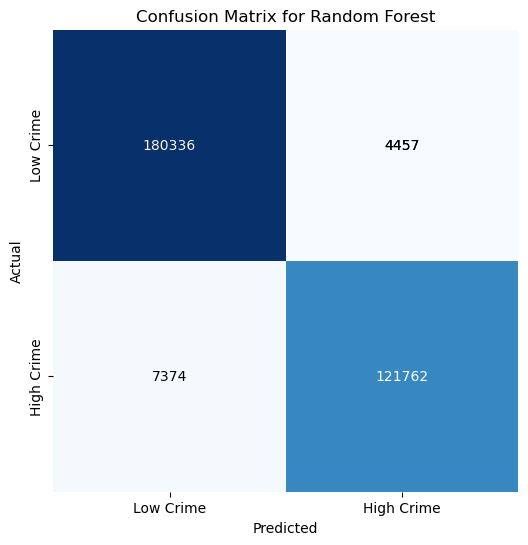

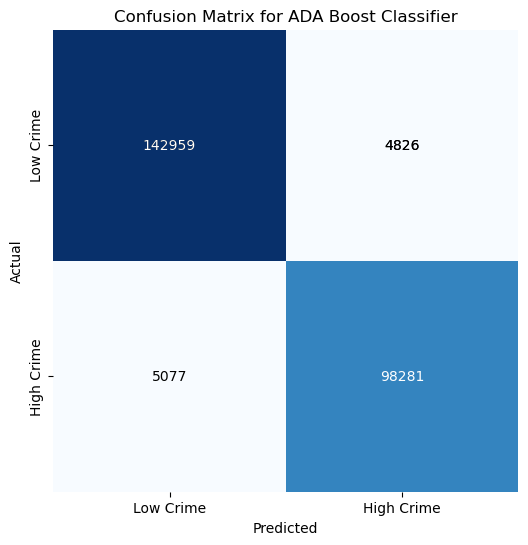

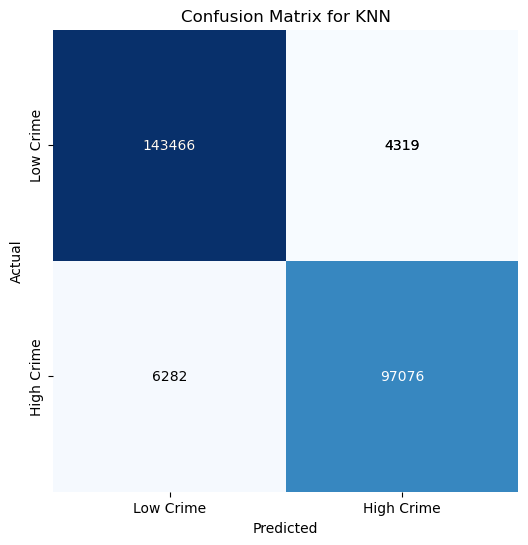

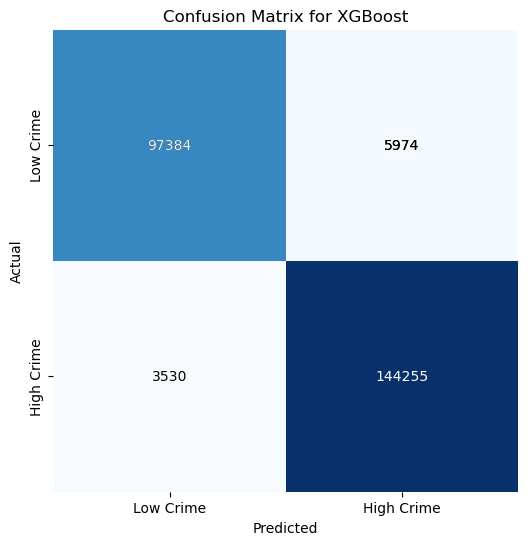

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to plot confusion matrix for each model
def plot_confusion_matrix(cm, model_name):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Low Crime', 'High Crime'],
                yticklabels=['Low Crime', 'High Crime'],
                annot_kws={"color": 'black'})  # Set default color to black

    # Set TP and TN annotation color to white
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i == j:
                text = ax.text(j + 0.5, i + 0.5, cm[i, j],
                               ha="center", va="center", color="white")
            else:
                text = ax.text(j + 0.5, i + 0.5, cm[i, j],
                               ha="center", va="center", color="black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plotting confusion matrix for each model
plot_confusion_matrix(conf_matrix_rf, 'Random Forest')
plot_confusion_matrix(conf_matrix_abc, 'ADA Boost Classifier')
plot_confusion_matrix(conf_matrix_knn, 'KNN')
plot_confusion_matrix(conf_matrix_xgb, 'XGBoost')

### Bar plot for comparison of Precision, Recall and F1-Score

/Users/lohithramesh/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


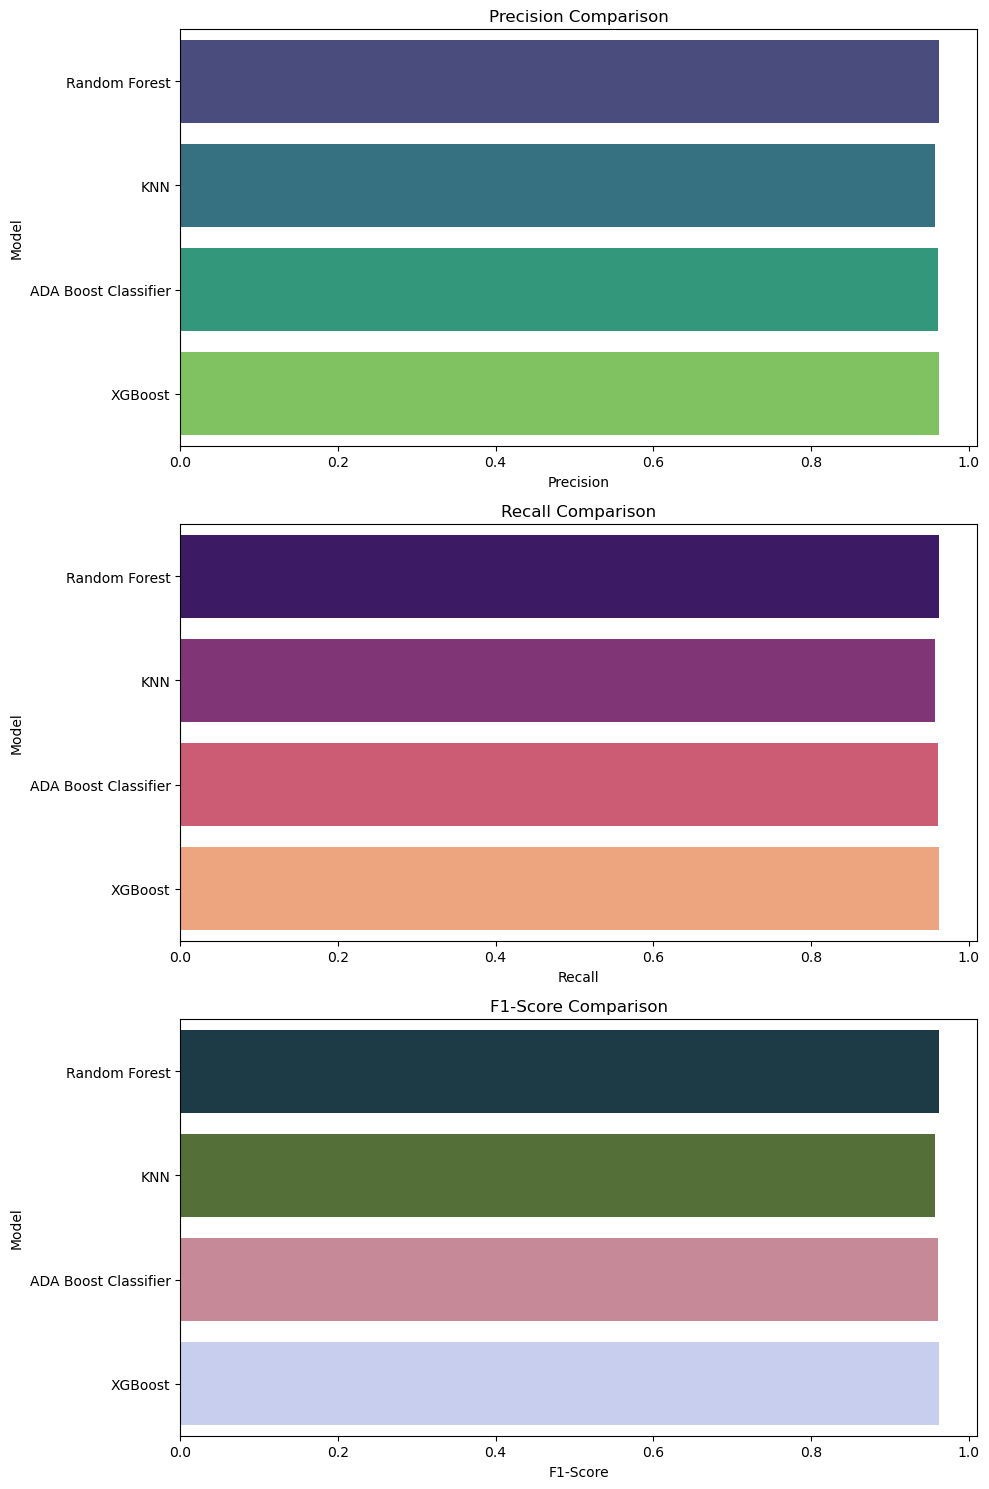

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# List of models
models = [
    ('Random Forest', rf_classifier),
    ('KNN', knn_classifier),
    ('ADA Boost Classifier', ada_boost),
    ('XGBoost', xgb_classifier)
]

# Dictionary to store metrics
metrics = {'Model': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Train and evaluate each model
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store metrics
    metrics['Model'].append(name)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)

# Create DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Plotting Precision, Recall, and F1-Score
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Precision Plot
sns.barplot(x='Precision', y='Model', data=metrics_df, ax=ax[0], palette='viridis')
ax[0].set_title('Precision Comparison')

# Recall Plot
sns.barplot(x='Recall', y='Model', data=metrics_df, ax=ax[1], palette='magma')
ax[1].set_title('Recall Comparison')

# F1-Score Plot
sns.barplot(x='F1-Score', y='Model', data=metrics_df, ax=ax[2], palette='cubehelix')
ax[2].set_title('F1-Score Comparison')

plt.tight_layout()
plt.show()